En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 

Una vez hecho este proceso, se 

In [1]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
# Se cargan los datos y se los transforma a dataframe para poder trabajar con los métodos de pandas

df_internet = pd.read_excel('../Data/Internet.xlsx')

In [14]:
df_internet.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       ...
       '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps',
       '1000 Mbps', '1024 Mbps', '4000 Mbps', '10000 Mbps'],
      dtype='object', length=125)

In [38]:
# Se verifican los valores faltantes
valores_faltantes = df_internet.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Link Indec      74
Otros         2035
0,256 Mbps    3029
0,5 Mbps      2423
0,512 Mbps    2540
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 122, dtype: int64

In [ ]:
# Imputación 

In [12]:
# Verificación de registros duplicados
duplicados = df_internet.duplicated().sum()
duplicados

np.int64(0)

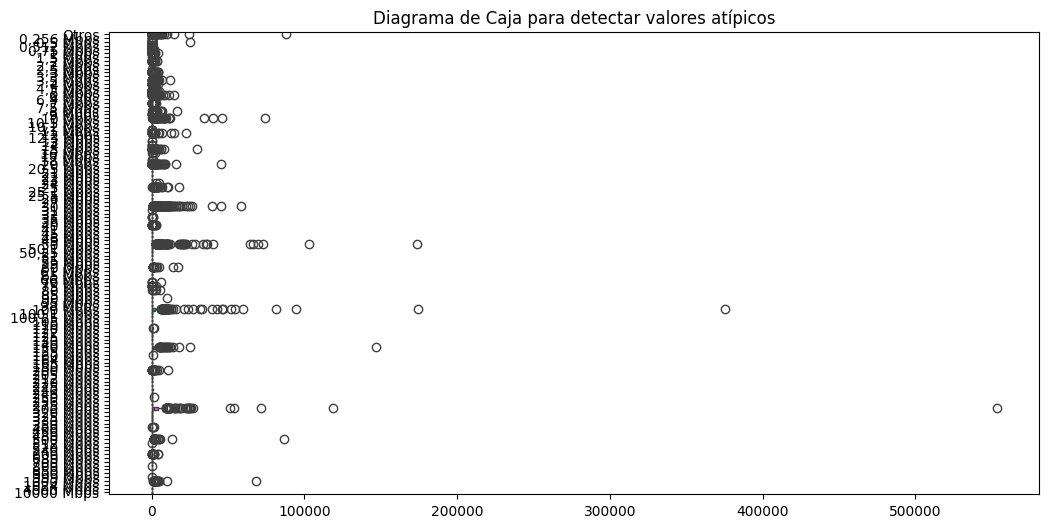

In [13]:
# Crear un boxplot para detectar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_internet, orient='h')
plt.title('Diagrama de Caja para detectar valores atípicos')
plt.show()

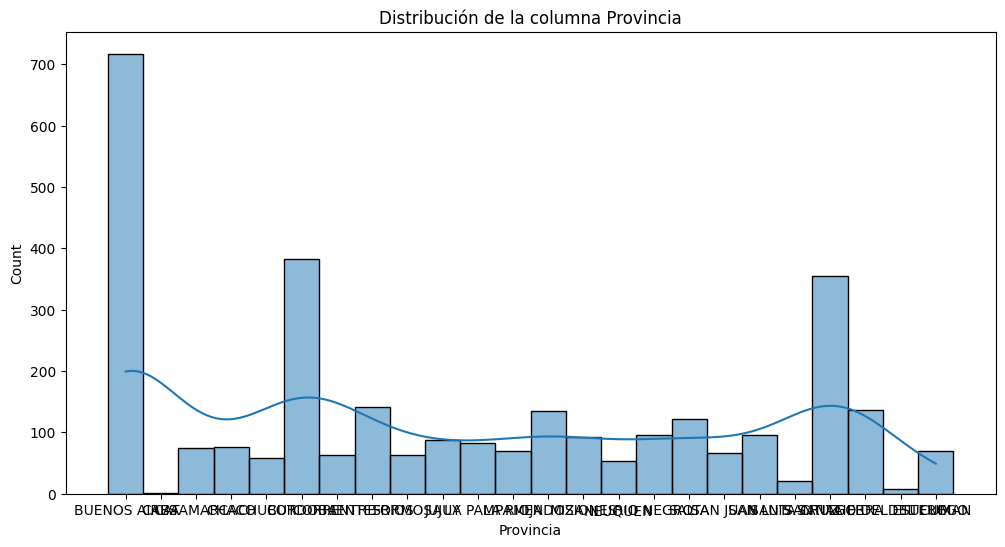

In [15]:
# Histograma de una columna específica
plt.figure(figsize=(12, 6))
sns.histplot(df_internet['Provincia'], kde=True)
plt.title('Distribución de la columna Provincia')
plt.show()


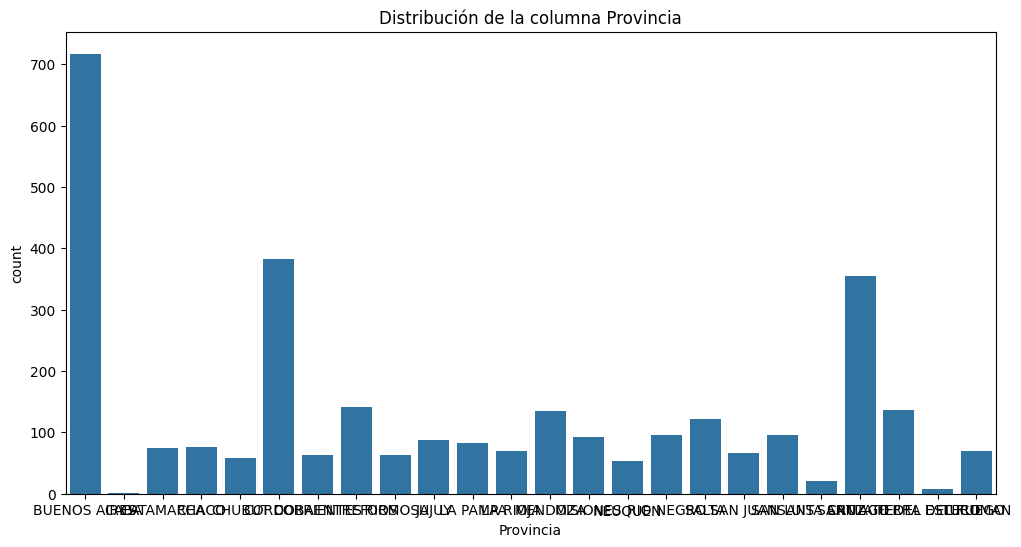

In [16]:
# Conteo de categorías
plt.figure(figsize=(12, 6))
sns.countplot(data=df_internet, x='Provincia')
plt.title('Distribución de la columna Provincia')
plt.show()


In [33]:
# Aplicar codificación de etiquetas

label_encoder = LabelEncoder()
df_internet['Provincia'] = label_encoder.fit_transform(df_internet['Provincia'])
df_internet['Partido'] = label_encoder.fit_transform(df_internet['Partido'])
df_internet['Localidad'] = label_encoder.fit_transform(df_internet['Localidad'])


In [36]:
df_internet.replace('Sin Datos', np.nan, inplace=True)

C:\Users\Flor\AppData\Local\Temp\ipykernel_14824\3712042411.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_internet.replace('Sin Datos', np.nan, inplace=True)


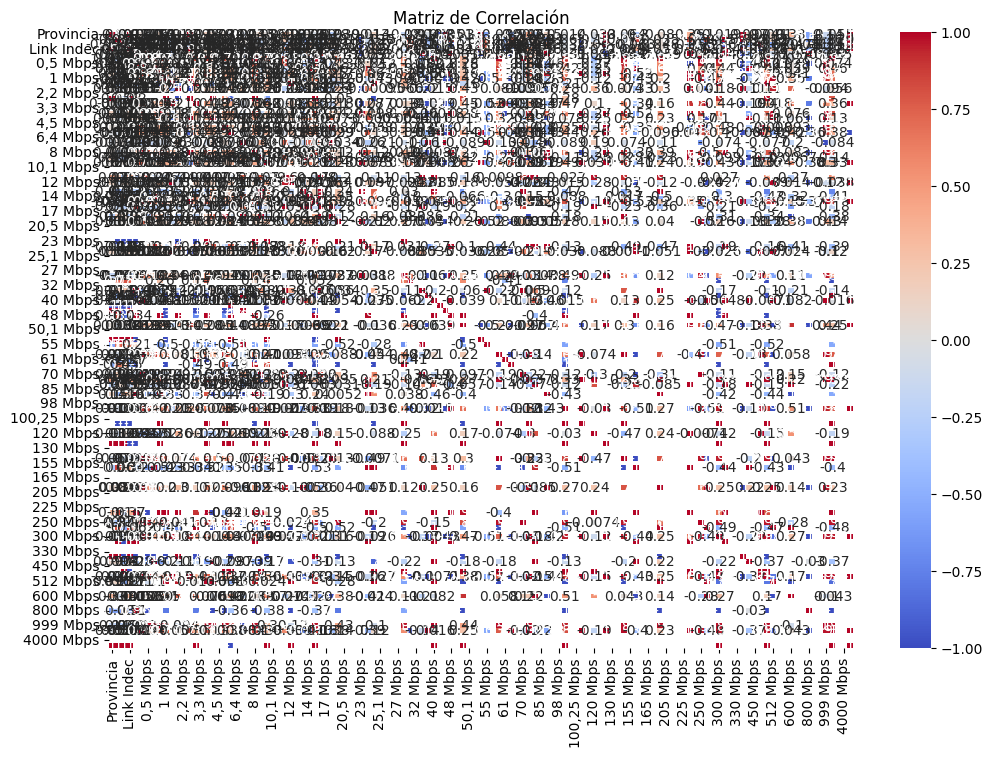

In [37]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_internet.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Modelado de datos